In [1135]:
import pandas as pd
import numpy as np
import category_encoders as ce
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

In [1136]:
df = pd.read_csv("train.csv")
df.info()

def outlier_remover(feature):
    A = df[feature].quantile(0.75)
    B = df[feature].quantile(0.25)
    IQR = A - B
    ub = A + 1.5*IQR
    lb = B - 1.5*IQR
    df.loc[df[feature]>=ub,feature] = ub
    df.loc[df[feature]<=lb,feature] = lb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [1137]:
for i in df.columns:
    outlier_remover(i)

C:\Users\shyam\AppData\Local\Temp\ipykernel_11536\450506348.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2760.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[feature]>=ub,feature] = ub
C:\Users\shyam\AppData\Local\Temp\ipykernel_11536\450506348.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[feature]>=ub,feature] = ub
C:\Users\shyam\AppData\Local\Temp\ipykernel_11536\450506348.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[feature]>=ub,feature] = ub
C:\Users\shyam\A

In [1138]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842.0,0.0,2.2,0.0,1,0.0,7,0.6,188.0,2,...,20,756.0,2549,9.0,7.0,19,1,0.0,1.0,1.0
1,1021.0,1.0,0.5,1.0,0,1.0,53,0.7,136.0,3,...,905,1988.0,2631,17.0,3.0,7,1,1.0,0.0,2.0
2,563.0,1.0,0.5,1.0,2,1.0,41,0.9,145.0,5,...,1263,1716.0,2603,11.0,2.0,9,1,1.0,0.0,2.0
3,615.0,1.0,2.5,0.0,0,0.0,10,0.8,131.0,6,...,1216,1786.0,2769,16.0,8.0,11,1,0.0,0.0,2.0
4,1821.0,1.0,1.2,0.0,13,1.0,44,0.6,141.0,2,...,1208,1212.0,1411,8.0,2.0,15,1,1.0,0.0,1.0


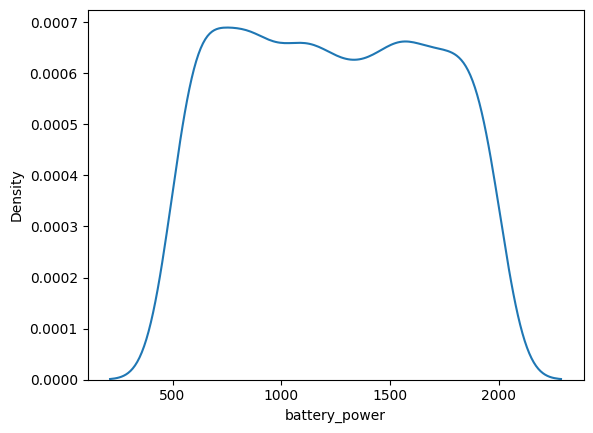

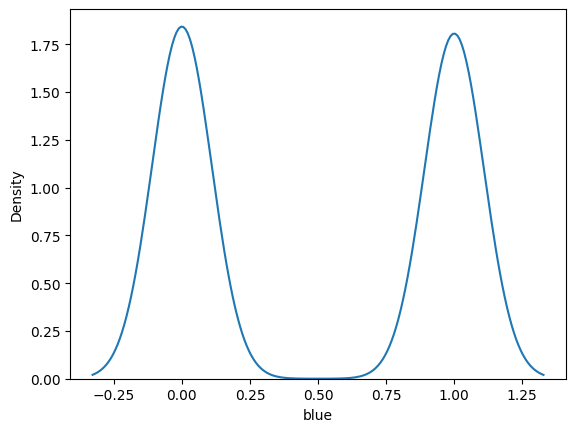

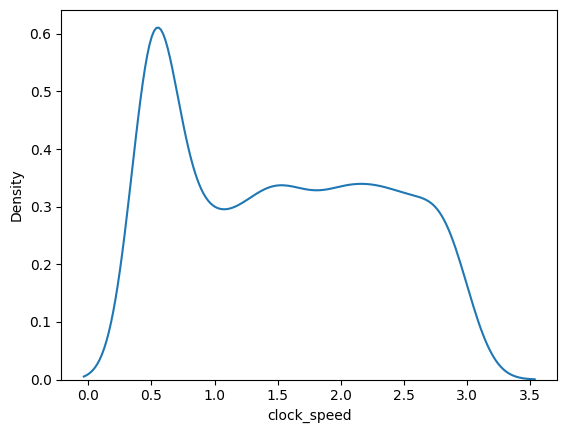

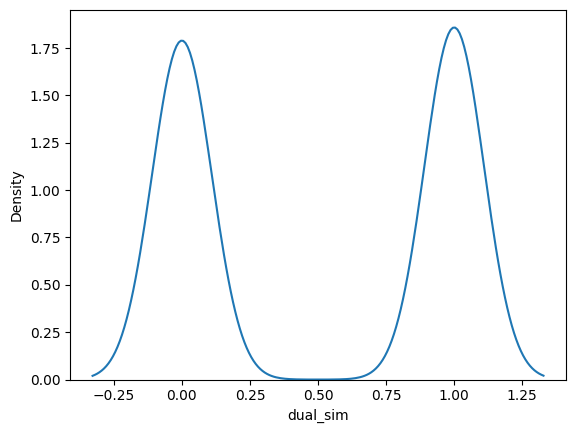

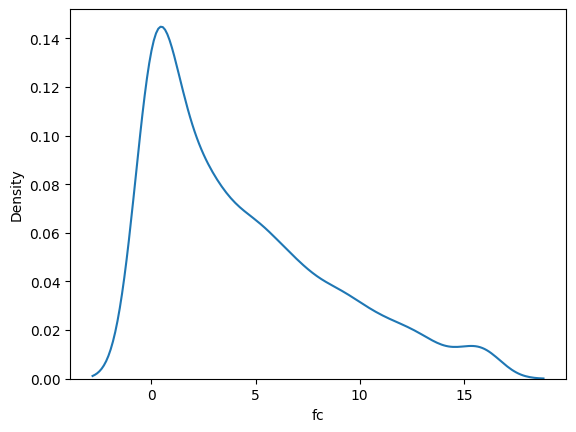

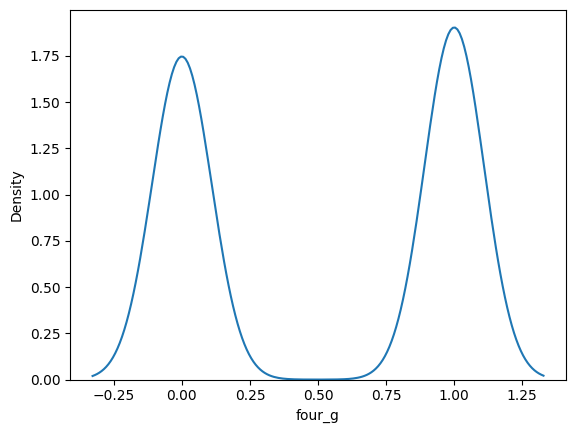

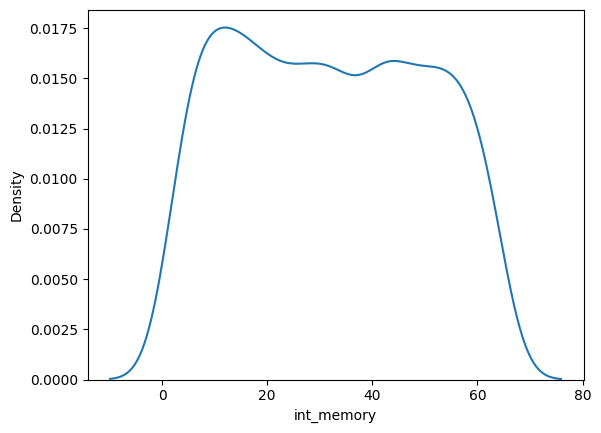

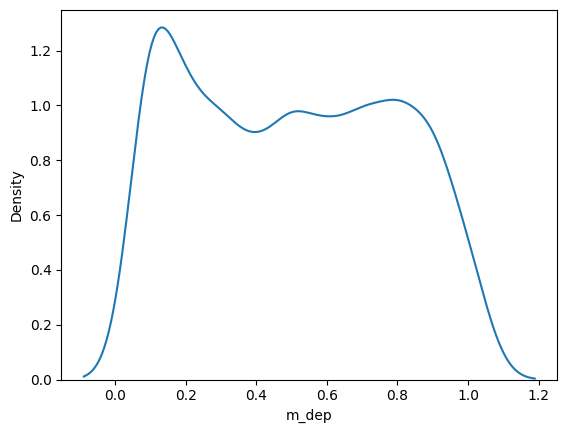

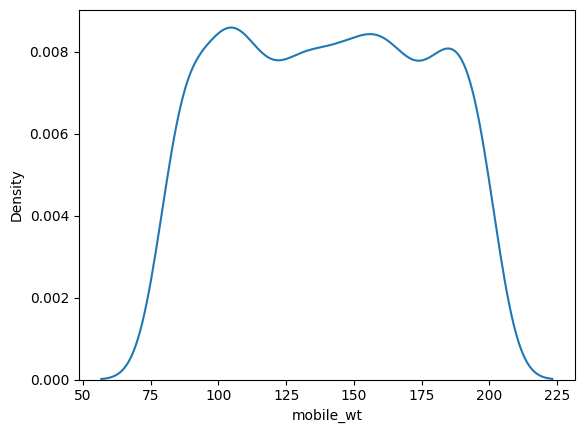

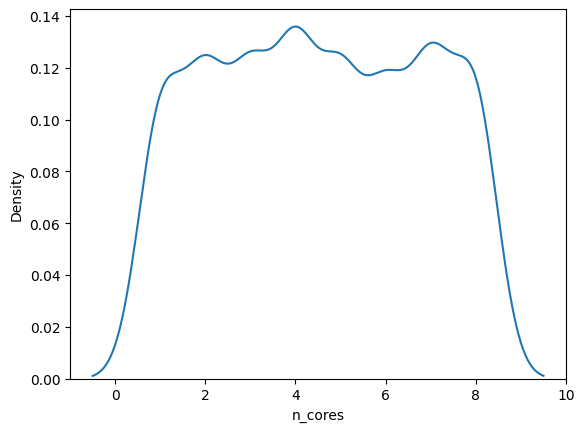

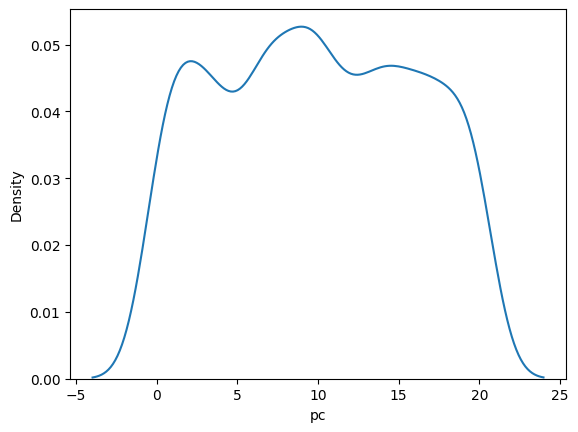

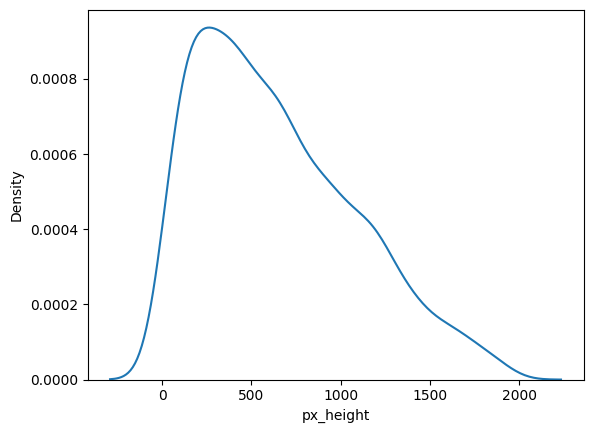

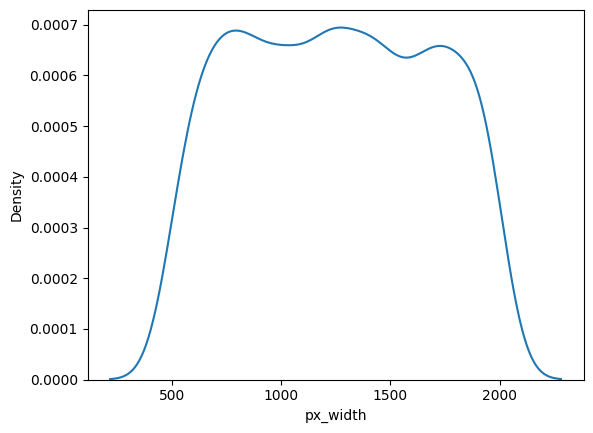

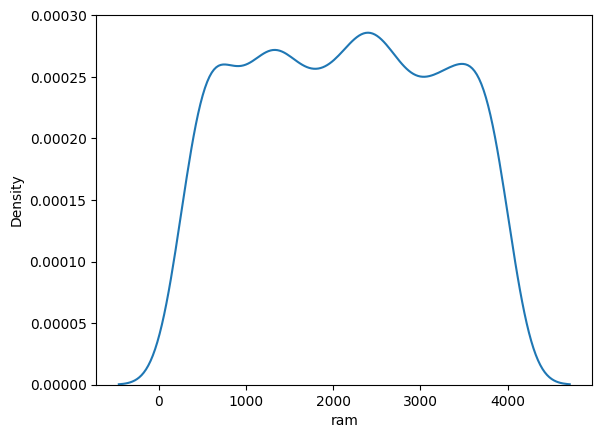

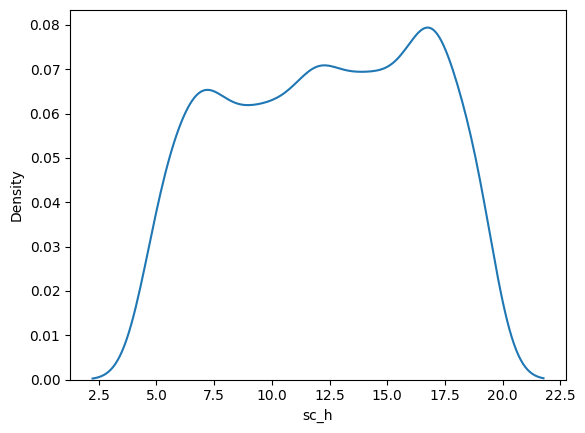

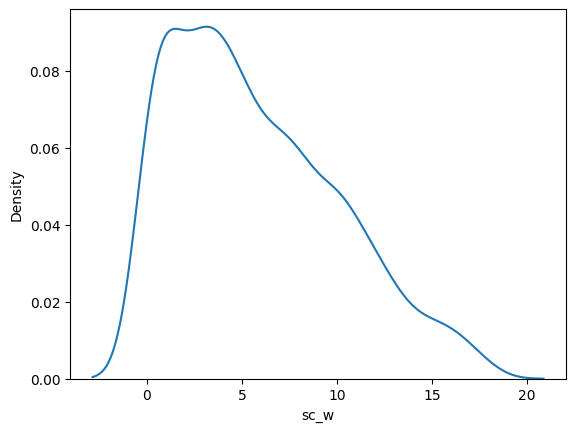

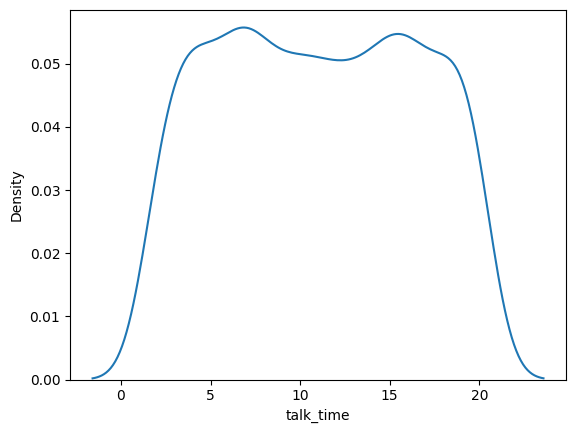

C:\Users\shyam\AppData\Local\Temp\ipykernel_11536\3993535744.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[i])


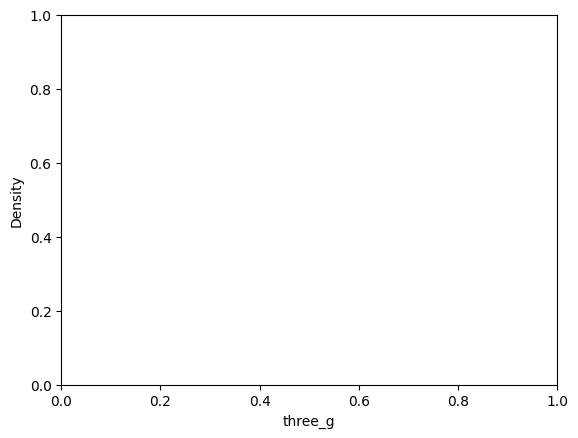

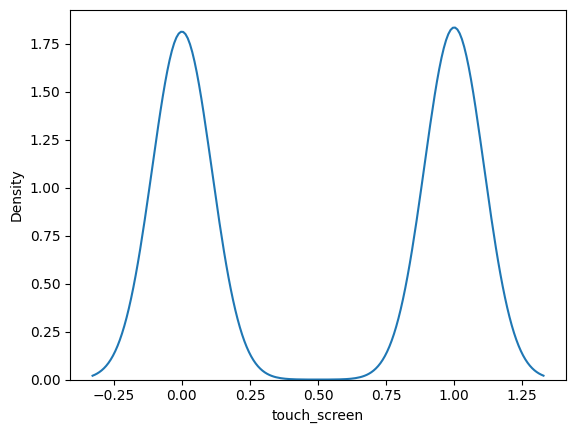

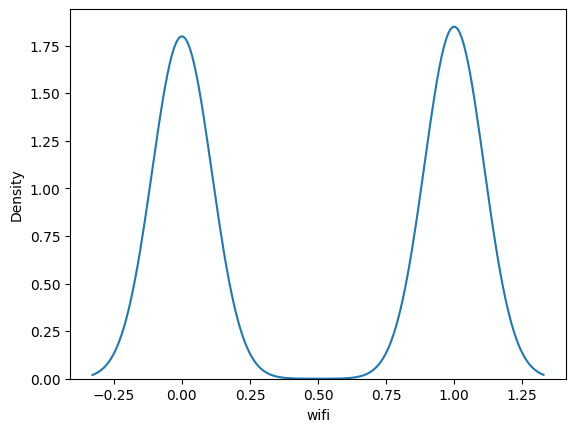

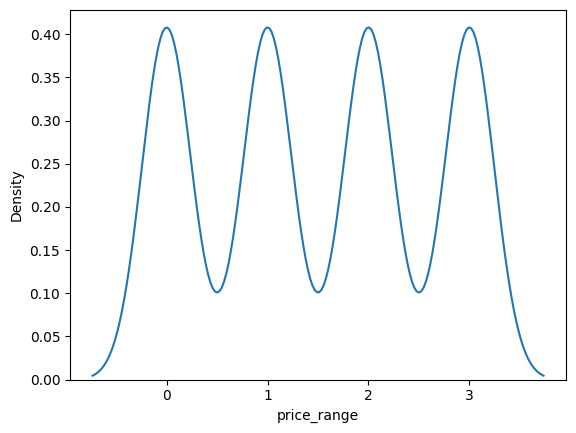

In [1139]:
for i in df.columns:
    sns.kdeplot(df[i])
    plt.show()

In [1140]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

# Assuming df contains your dataset

# Step 1: Split the data into features (X) and target variable (y)
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Step 3: Initialize and train different classification models
model = SVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print("acc:-",acc*100)

acc:- 96.5


In [1141]:
#import joblib
#joblib.dump(model,'trained_model.pkl')
#model.decision_function

In [1142]:
single_row_values = [
    1500,  # battery_power
    1,     # blue
    2.0,   # clock_speed
    1,     # dual_sim
    5,     # fc
    1,     # four_g
    16,    # int_memory
    0.5,   # m_dep
    180,   # mobile_wt
    4,     # n_cores
    8,     # pc
    800,   # px_height
    1280,  # px_width
    2048,  # ram
    12,    # sc_h
    7,     # sc_w
    16,    # talk_time
    1,     # three_g
    1,     # touch_screen
    1      # wifi
]
input_data = np.array(single_row_values).reshape(1, -1)
z = model.predict(input_data)
print(int(z))

2


C:\Users\shyam\AppData\Local\Temp\ipykernel_11536\2417953727.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(int(z))


In [1143]:
df["price_range"].unique()

array([1., 2., 3., 0.])